In [1]:
!pip install statsbombpy

In [2]:
!pip install mplsoccer

In [3]:
from statsbombpy import sb

In [4]:
events = sb.events(match_id = 18236)

/usr/local/lib/python3.7/dist-packages/statsbombpy/api_client.py:20: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn("credentials were not supplied. open data access only", NoAuthWarning)


In [5]:
events = events[['team','type','minute','location','pass_end_location','player','pass_recipient']]

In [6]:
events_1=events[events['team']=='Manchester United']
events_1

,team,type,minute,location,pass_end_location,player,pass_recipient
1,Manchester United,Starting XI,0,NaN,NaN,NaN,NaN
2,Manchester United,Half Start,0,NaN,NaN,NaN,NaN
4,Manchester United,Half Start,45,NaN,NaN,NaN,NaN
6,Manchester United,Pass,0,"[61.0, 41.0]","[60.0, 42.0]",Javier Hernández Balcázar,Wayne Mark Rooney
7,Manchester United,Pass,0,"[60.0, 42.0]","[56.0, 39.0]",Wayne Mark Rooney,Ryan Giggs
...,...,...,...,...,...,...,...
4313,Manchester United,Referee Ball-Drop,44,"[64.0, 18.0]",NaN,NaN,NaN
4315,Manchester United,Half End,45,NaN,NaN,NaN,NaN
4317,Manchester United,Half End,93,NaN,NaN,NaN,NaN
4320,Manchester United,Substitution,68,NaN,NaN,Fábio Pereira da Silva,NaN


In [7]:
events_1[events_1['type']=='Substitution']

,team,type,minute,location,pass_end_location,player,pass_recipient
4320,Manchester United,Substitution,68,NaN,NaN,Fábio Pereira da Silva,NaN
4321,Manchester United,Substitution,76,NaN,NaN,Michael Carrick,NaN


In [8]:
pass_events=events_1[events_1['type']=='Pass'].reset_index()
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,6,Manchester United,Pass,0,"[61.0, 41.0]","[60.0, 42.0]",Javier Hernández Balcázar,Wayne Mark Rooney
1,7,Manchester United,Pass,0,"[60.0, 42.0]","[56.0, 39.0]",Wayne Mark Rooney,Ryan Giggs
2,8,Manchester United,Pass,0,"[57.0, 41.0]","[87.0, 80.0]",Ryan Giggs,Luis Antonio Valencia Mosquera
3,12,Manchester United,Pass,0,"[68.0, 15.0]","[65.0, 26.0]",Ji-Sung Park,NaN
4,13,Manchester United,Pass,0,"[81.0, 35.0]","[93.0, 4.0]",Michael Carrick,Javier Hernández Balcázar
...,...,...,...,...,...,...,...,...
390,1212,Manchester United,Pass,92,"[40.0, 11.0]","[39.0, 21.0]",Patrice Evra,Paul Scholes
391,1213,Manchester United,Pass,92,"[39.0, 22.0]","[42.0, 39.0]",Paul Scholes,Rio Ferdinand
392,1214,Manchester United,Pass,92,"[42.0, 39.0]","[58.0, 40.0]",Rio Ferdinand,Ji-Sung Park
393,1226,Manchester United,Pass,92,"[5.0, 2.0]","[2.0, 24.0]",Nemanja Vidić,Edwin van der Sar


In [9]:
pass_events=pass_events[pass_events['minute']<68]
pass_events

,index,team,type,minute,location,pass_end_location,player,pass_recipient
0,6,Manchester United,Pass,0,"[61.0, 41.0]","[60.0, 42.0]",Javier Hernández Balcázar,Wayne Mark Rooney
1,7,Manchester United,Pass,0,"[60.0, 42.0]","[56.0, 39.0]",Wayne Mark Rooney,Ryan Giggs
2,8,Manchester United,Pass,0,"[57.0, 41.0]","[87.0, 80.0]",Ryan Giggs,Luis Antonio Valencia Mosquera
3,12,Manchester United,Pass,0,"[68.0, 15.0]","[65.0, 26.0]",Ji-Sung Park,NaN
4,13,Manchester United,Pass,0,"[81.0, 35.0]","[93.0, 4.0]",Michael Carrick,Javier Hernández Balcázar
...,...,...,...,...,...,...,...,...
252,876,Manchester United,Pass,66,"[36.0, 72.0]","[28.0, 61.0]",Fábio Pereira da Silva,Rio Ferdinand
253,877,Manchester United,Pass,66,"[28.0, 61.0]","[51.0, 55.0]",Rio Ferdinand,Ji-Sung Park
254,878,Manchester United,Pass,66,"[51.0, 55.0]","[43.0, 51.0]",Ji-Sung Park,Michael Carrick
255,879,Manchester United,Pass,66,"[39.0, 47.0]","[57.0, 36.0]",Michael Carrick,Wayne Mark Rooney


In [10]:
passes_between=pass_events.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
passes_between

,player,pass_recipient,type
0,Edwin van der Sar,Fábio Pereira da Silva,2
1,Edwin van der Sar,Javier Hernández Balcázar,3
2,Edwin van der Sar,Ji-Sung Park,1
3,Edwin van der Sar,Luis Antonio Valencia Mosquera,1
4,Edwin van der Sar,Patrice Evra,1
...,...,...,...
74,Wayne Mark Rooney,Michael Carrick,4
75,Wayne Mark Rooney,Nemanja Vidić,2
76,Wayne Mark Rooney,Patrice Evra,2
77,Wayne Mark Rooney,Rio Ferdinand,1


In [11]:
#for all events for france
game=events_1[(events_1['player'].isin(passes_between['player'])) & (events_1['pass_recipient'].isin(passes_between['pass_recipient']))]
game['pass_recipient'].nunique()

11

In [12]:
game=game.groupby(['player','pass_recipient'],as_index=False).agg({'type':'count'})
game

,player,pass_recipient,type
0,Edwin van der Sar,Fábio Pereira da Silva,2
1,Edwin van der Sar,Javier Hernández Balcázar,3
2,Edwin van der Sar,Ji-Sung Park,1
3,Edwin van der Sar,Luis Antonio Valencia Mosquera,2
4,Edwin van der Sar,Michael Carrick,1
...,...,...,...
79,Wayne Mark Rooney,Michael Carrick,5
80,Wayne Mark Rooney,Nemanja Vidić,3
81,Wayne Mark Rooney,Patrice Evra,3
82,Wayne Mark Rooney,Rio Ferdinand,1


In [13]:
game.rename(columns={'type':'pass_count'},inplace=True)

In [14]:
game.describe()

,pass_count
count,84.000000
mean,3.845238
std,2.677411
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,11.000000


In [15]:
desc=game.describe()
threshold=desc.iloc[4]
thresh=threshold.item()
game=game[game['pass_count']>thresh].reset_index(drop=True)
game.describe()

,pass_count
count,49.000000
mean,5.571429
std,2.217356
min,3.000000
25%,4.000000
50%,5.000000
75%,7.000000
max,11.000000


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,10))
scaler.fit(game['pass_count'].values.reshape(-1,1))
game['pass_count']=scaler.transform(game['pass_count'].values.reshape(-1,1))
game

,player,pass_recipient,pass_count
0,Edwin van der Sar,Javier Hernández Balcázar,0.00
1,Edwin van der Sar,Rio Ferdinand,3.75
2,Edwin van der Sar,Wayne Mark Rooney,10.00
3,Fábio Pereira da Silva,Luis Antonio Valencia Mosquera,2.50
4,Fábio Pereira da Silva,Rio Ferdinand,0.00
5,Fábio Pereira da Silva,Ryan Giggs,5.00
6,Fábio Pereira da Silva,Wayne Mark Rooney,1.25
7,Javier Hernández Balcázar,Michael Carrick,1.25
8,Javier Hernández Balcázar,Ryan Giggs,0.00
9,Javier Hernández Balcázar,Wayne Mark Rooney,2.50


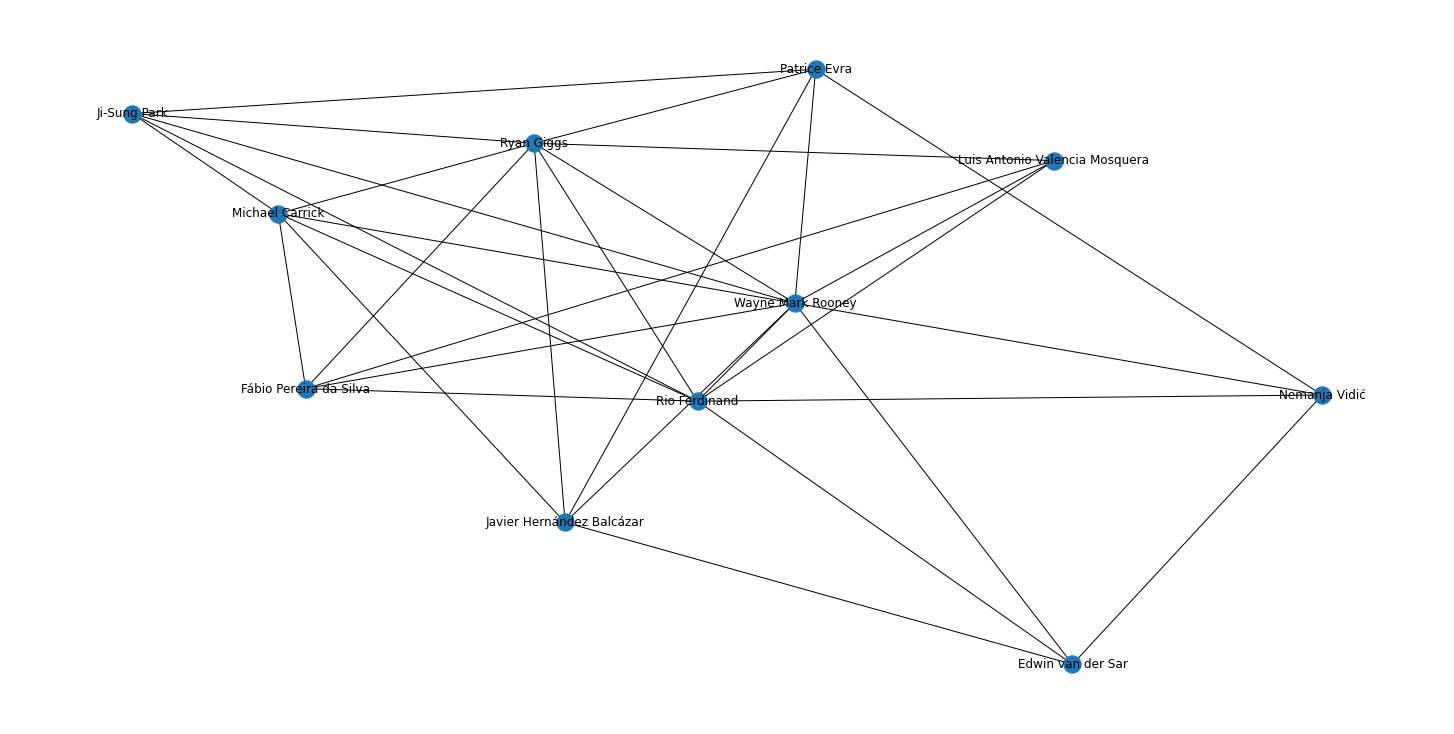

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with 4 connections
# Build your graph
G=nx.from_pandas_edgelist(game, 'player', 'pass_recipient',edge_attr='pass_count')
 
# Plot it
plt.figure(figsize=(20,10))
nx.draw(G, with_labels=True)
plt.show()

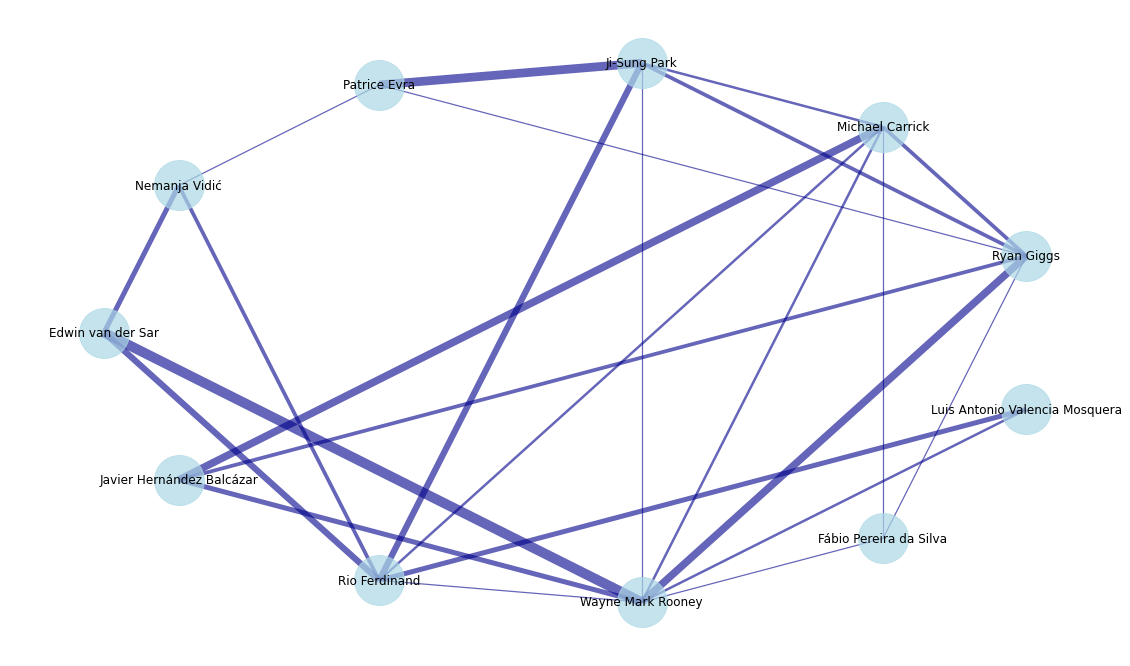

In [18]:
widths = nx.get_edge_attributes(G, 'pass_count')
nodelist = G.nodes()

plt.figure(figsize=(20,12))

pos = nx.shell_layout(G)
nx.draw_networkx_nodes(G,pos,
                       nodelist=nodelist,
                       node_size=2500,
                       node_color='lightblue',
                       alpha=0.7)
nx.draw_networkx_edges(G,pos,
                       edgelist = widths.keys(),
                       width=list(widths.values()),
                       edge_color='darkblue',
                       alpha=0.6)
nx.draw_networkx_labels(G, pos=pos,
                        labels=dict(zip(nodelist,nodelist)),
                        font_color='black')
plt.box(False)
plt.show()

In [19]:
import pandas as pd
df3 = pd.DataFrame(events_1)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
1,Manchester United,Starting XI,0,NaN,NaN,NaN,NaN
2,Manchester United,Half Start,0,NaN,NaN,NaN,NaN
4,Manchester United,Half Start,45,NaN,NaN,NaN,NaN
6,Manchester United,Pass,0,"[61.0, 41.0]","[60.0, 42.0]",Javier Hernández Balcázar,Wayne Mark Rooney
7,Manchester United,Pass,0,"[60.0, 42.0]","[56.0, 39.0]",Wayne Mark Rooney,Ryan Giggs
...,...,...,...,...,...,...,...
4313,Manchester United,Referee Ball-Drop,44,"[64.0, 18.0]",NaN,NaN,NaN
4315,Manchester United,Half End,45,NaN,NaN,NaN,NaN
4317,Manchester United,Half End,93,NaN,NaN,NaN,NaN
4320,Manchester United,Substitution,68,NaN,NaN,Fábio Pereira da Silva,NaN


In [20]:
df3=df3[df3['player'].notna()]
df3=df3[df3['location'].notna()]
df3

,team,type,minute,location,pass_end_location,player,pass_recipient
6,Manchester United,Pass,0,"[61.0, 41.0]","[60.0, 42.0]",Javier Hernández Balcázar,Wayne Mark Rooney
7,Manchester United,Pass,0,"[60.0, 42.0]","[56.0, 39.0]",Wayne Mark Rooney,Ryan Giggs
8,Manchester United,Pass,0,"[57.0, 41.0]","[87.0, 80.0]",Ryan Giggs,Luis Antonio Valencia Mosquera
12,Manchester United,Pass,0,"[68.0, 15.0]","[65.0, 26.0]",Ji-Sung Park,NaN
13,Manchester United,Pass,0,"[81.0, 35.0]","[93.0, 4.0]",Michael Carrick,Javier Hernández Balcázar
...,...,...,...,...,...,...,...
4303,Manchester United,Clearance,51,"[14.0, 51.0]",NaN,Fábio Pereira da Silva,NaN
4304,Manchester United,Clearance,62,"[6.0, 46.0]",NaN,Nemanja Vidić,NaN
4305,Manchester United,Clearance,66,"[5.0, 43.0]",NaN,Nemanja Vidić,NaN
4306,Manchester United,Clearance,66,"[7.0, 21.0]",NaN,Patrice Evra,NaN


In [21]:
df3[['locationx','locationy']] = pd.DataFrame(df3.location.tolist(), index= df3.index)
df3

,team,type,minute,location,pass_end_location,player,pass_recipient,locationx,locationy
6,Manchester United,Pass,0,"[61.0, 41.0]","[60.0, 42.0]",Javier Hernández Balcázar,Wayne Mark Rooney,61.0,41.0
7,Manchester United,Pass,0,"[60.0, 42.0]","[56.0, 39.0]",Wayne Mark Rooney,Ryan Giggs,60.0,42.0
8,Manchester United,Pass,0,"[57.0, 41.0]","[87.0, 80.0]",Ryan Giggs,Luis Antonio Valencia Mosquera,57.0,41.0
12,Manchester United,Pass,0,"[68.0, 15.0]","[65.0, 26.0]",Ji-Sung Park,NaN,68.0,15.0
13,Manchester United,Pass,0,"[81.0, 35.0]","[93.0, 4.0]",Michael Carrick,Javier Hernández Balcázar,81.0,35.0
...,...,...,...,...,...,...,...,...,...
4303,Manchester United,Clearance,51,"[14.0, 51.0]",NaN,Fábio Pereira da Silva,NaN,14.0,51.0
4304,Manchester United,Clearance,62,"[6.0, 46.0]",NaN,Nemanja Vidić,NaN,6.0,46.0
4305,Manchester United,Clearance,66,"[5.0, 43.0]",NaN,Nemanja Vidić,NaN,5.0,43.0
4306,Manchester United,Clearance,66,"[7.0, 21.0]",NaN,Patrice Evra,NaN,7.0,21.0


In [22]:
df3=df3.groupby(by=['player'],as_index=False).agg({'locationx':'mean','locationy':'mean'})
df3

,player,locationx,locationy
0,Edwin van der Sar,10.826531,41.775510
1,Fábio Pereira da Silva,54.261905,66.321429
2,Javier Hernández Balcázar,87.173469,34.204082
3,Ji-Sung Park,64.862857,26.708571
4,Luis Antonio Valencia Mosquera,59.185484,65.709677
5,Luís Carlos Almeida da Cunha,64.528302,52.056604
6,Michael Carrick,51.030303,43.030303
7,Nemanja Vidić,37.891892,27.567568
8,Patrice Evra,62.591667,15.116667
9,Paul Scholes,53.346154,36.903846


In [23]:
df3=df3[df3['player'].isin(game['player'].unique())].reset_index(drop=True)

In [24]:
df3.loc[(df3['locationy']<50.0),'location_y']=(100-df3['locationy'])
df3.loc[(df3['locationy']>50.0),'location_y']=(100-df3['locationy'])
df3

,player,locationx,locationy,location_y
0,Edwin van der Sar,10.826531,41.775510,58.224490
1,Fábio Pereira da Silva,54.261905,66.321429,33.678571
2,Javier Hernández Balcázar,87.173469,34.204082,65.795918
3,Ji-Sung Park,64.862857,26.708571,73.291429
4,Luis Antonio Valencia Mosquera,59.185484,65.709677,34.290323
5,Michael Carrick,51.030303,43.030303,56.969697
6,Nemanja Vidić,37.891892,27.567568,72.432432
7,Patrice Evra,62.591667,15.116667,84.883333
8,Rio Ferdinand,37.253521,54.295775,45.704225
9,Ryan Giggs,65.427746,30.589595,69.410405


In [25]:
df3.set_index('player',inplace=True)

In [26]:

!pip install highlight_text

In [27]:
import matplotlib as mpl
from mplsoccer.pitch import Pitch
from matplotlib.colors import to_rgba
import numpy as np
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colorbar
from matplotlib.colors import LinearSegmentedColormap
from highlight_text import fig_text
import math

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


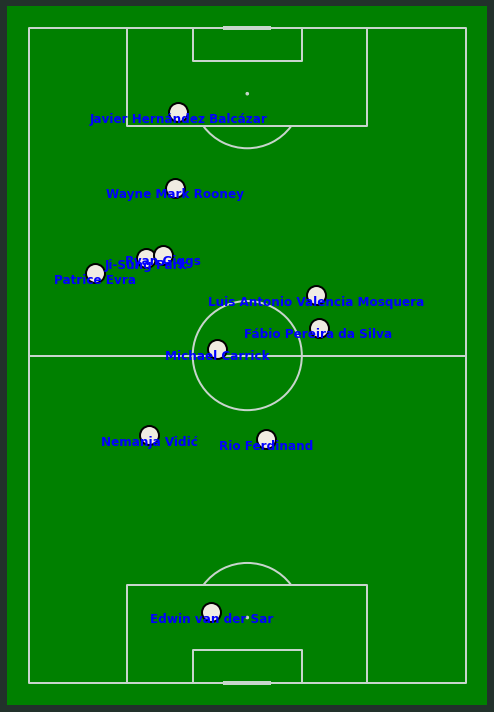

In [28]:
#plotting the average location for the players
#Make arrows less transparent if they have a higher count, totally optional of course
from mplsoccer import Pitch, VerticalPitch
import numpy as np
min_transparency = 0.3
color = np.array(to_rgba('#d3d3d3'))
color = np.tile(color, (len(df3), 1))


#plot pitch
pitch = VerticalPitch(pitch_type='statsbomb', orientation='vertical',
              pitch_color='green', line_color='#c7d5cc', figsize=(20, 1),
              constrained_layout=True, tight_layout=False,half=False)
fig, ax = pitch.draw(figsize=(20,10))



''' 
pass_arrows = pitch.arrows(1.2*passes_between.x, 80-0.8*passes_between.y,
                         1.2*passes_between.x_end, 80-0.8*passes_between.y_end, width=5,
                         headwidth=5, headlength=5, color=color, ax=ax, zorder=1)

size=1000
radius = math.sqrt(size)/2.
arrow = mpl.patches.FancyArrowPatch(posA=(1.2*passes_between.x,80-.8*passes_between.y), 
                                    posB=(1.2*passes_between.x_end,80-.8*passes_between.y_end), 
                                    arrowstyle='-|>', mutation_scale=20, shrinkA=radius, shrinkB=radius)

ax.add_patch(arrow)
 '''
#plot nodes
pass_nodes = pitch.scatter(1.2*df3.locationx, 80-0.8*df3.location_y,s=360,
                           color='#f0ece2', edgecolors="#010101", linewidth=2, alpha=1, ax=ax, zorder=2)


#anootation/key at bottom
# pitch.annotate("Node Positions = Average Start Location of Completed Passes\nArrows Show Pass Combinations Which Occured Over 5 Times", (-4, 40), color='w',
#                fontsize=10, ha='center', va='center', ax=ax, fontweight='bold', fontfamily="Andale Mono")


#Uncomment these next two lines to get each node labeled with the player id. Check to see if anything looks off, and make note of each player if you're going to add labeles later like their numbers
for index, row in df3.iterrows():
     pitch.annotate(row.name, xy=(1.2*row.locationx, 80-0.8*row.location_y), c='blue', va='top', ha='center', size=12, fontweight='bold', fontfamily="Calibri",ax=ax)

#Set the background color
fig.patch.set_facecolor('#22312b')


In [29]:
nx.write_gml(G, "BARvsMU(MU).gml")